In [2]:
import pandas as pd
import numpy as np
%load_ext rpy2.ipython

### Load all the data sets from:

logD: CHEMBL3301363

HLM Clint: CHEMBL3301370

hPPB: CHEMBL3301365

solubility: CHEMBL3301364

In [3]:
logD = pd.read_csv("bioactivity-18_13_01_45.csv", sep=r'\t', engine='python')

In [4]:
HLM_clint = pd.read_csv("bioactivity-18_13_02_40.txt", sep=r'\t', engine='python')

In [5]:
hPPb = pd.read_csv("bioactivity-18_13_03_06.txt",sep=r'\t', engine='python')

In [6]:
Sol = pd.read_csv("bioactivity-18_13_03_50.txt",sep=r'\t', engine='python')

### Select columns
Using one data set select only the columns that will be used for the analysis.

In [7]:
# print all the columns
logD.columns

Index(['CMPD_CHEMBLID', 'MOLREGNO', 'PARENT_CMPD_CHEMBLID', 'PARENT_MOLREGNO',
       'MOL_PREF_NAME', 'COMPOUND_KEY', 'MOLWEIGHT', 'ALOGP', 'PSA',
       'NUM_RO5_VIOLATIONS', 'CANONICAL_SMILES', 'ACTIVITY_ID',
       'STANDARD_TYPE', 'RELATION', 'STANDARD_VALUE', 'STANDARD_UNITS',
       'PCHEMBL_VALUE', 'PUBLISHED_TYPE', 'PUBLISHED_RELATION',
       'PUBLISHED_VALUE', 'PUBLISHED_UNITS', 'ACTIVITY_COMMENT',
       'DATA_VALIDITY_COMMENT', 'POTENTIAL_DUPLICATE', 'BAO_ENDPOINT',
       'UO_UNITS', 'QUDT_UNITS', 'ASSAY_ID', 'ASSAY_CHEMBLID', 'ASSAY_TYPE',
       'DESCRIPTION', 'ASSAY_SRC_ID', 'ASSAY_SRC_DESCRIPTION',
       'ASSAY_ORGANISM', 'ASSAY_STRAIN', 'ASSAY_TAX_ID', 'CURATED_BY',
       'BAO_FORMAT', 'TID', 'TARGET_CHEMBLID', 'TARGET_TYPE',
       'PROTEIN_ACCESSION', 'PREF_NAME', 'ORGANISM', 'CONFIDENCE_SCORE',
       'TARGET_MAPPING', 'APD_NAME', 'APD_CONFIDENCE', 'DOC_ID',
       'DOC_CHEMBLID', 'PUBMED_ID', 'JOURNAL', 'YEAR', 'VOLUME', 'ISSUE',
       'FIRST_PAGE', 'CELL_ID',

For this task I will select the following columns: 'CMPD_CHEMBLID', 'MOLWEIGHT', 'ALOGP', 'PSA',
       'NUM_RO5_VIOLATIONS'

In [8]:
col = ['CMPD_CHEMBLID','MOLWEIGHT', 'ALOGP', 'PSA', 'NUM_RO5_VIOLATIONS']

### Remove columns
Check for missing values and remove them.

In [9]:
logD_= logD[col]

In [10]:
# remove missing values
logD_na= logD_.dropna(axis = 0)

In [11]:
# print the lenght of the data set before and after 
print("Lenght logD_:", len(logD))
print("Lenght logD_na:", len(logD_na))

Lenght logD_: 4200
Lenght logD_na: 4189


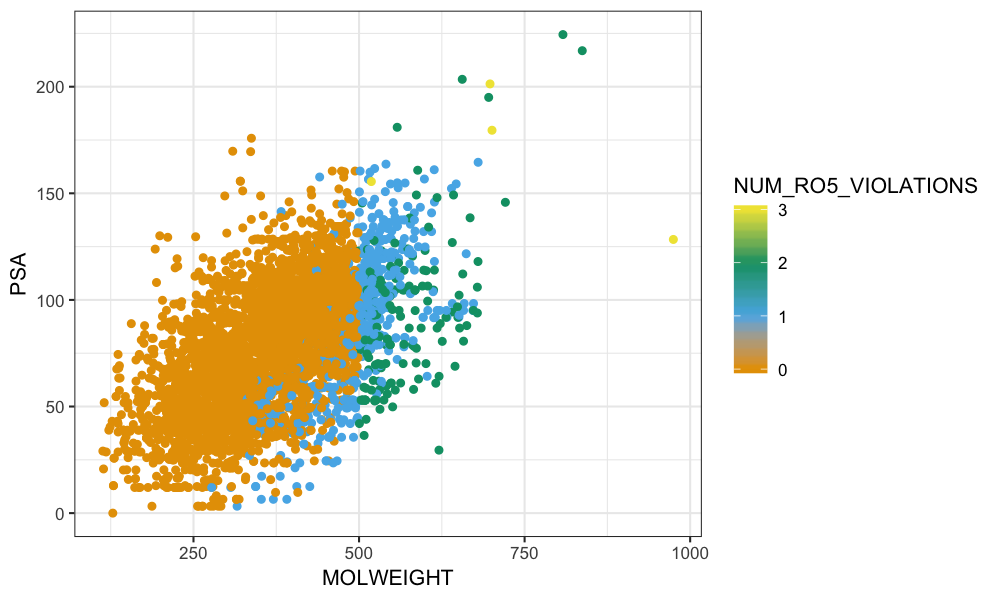

In [13]:
%%R -i logD_na --width 1000 --height 600 -r 140 --bg #F8F4E9
library(ggplot2)
ggplot(logD_na, aes(logD_na$MOLWEIGHT, logD_na$PSA)) +
  geom_point(aes(colour = logD_na$NUM_RO5_VIOLATIONS)) + theme_bw() +
  scale_colour_gradientn(name="NUM_RO5_VIOLATIONS", colours=c("#E69F00", "#56B4E9", "#009E73", "#F0E442")) +
  xlab("MOLWEIGHT") + ylab("PSA")

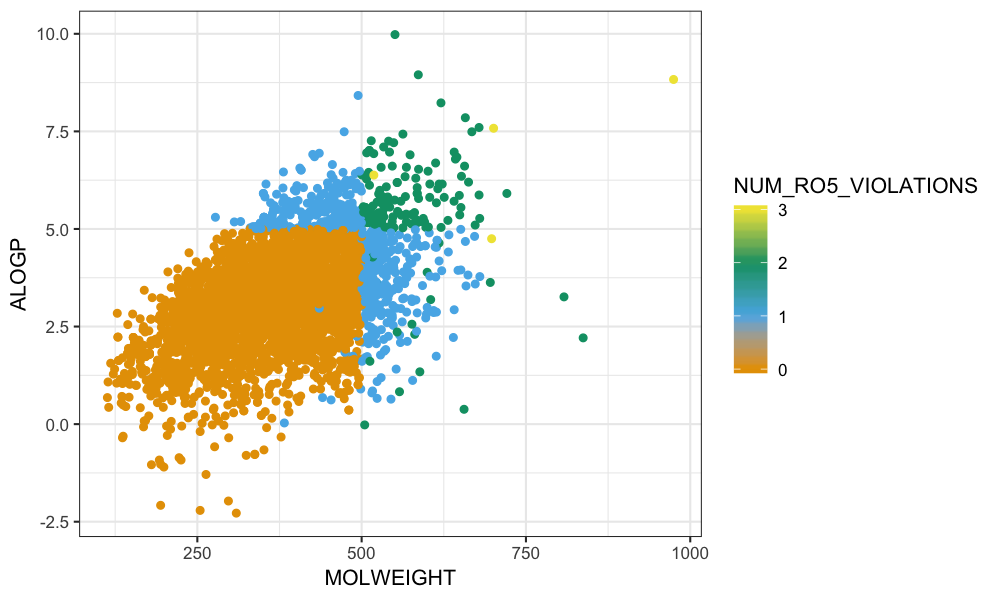

In [13]:
 %%R -i logD_na --width 1000 --height 600 -r 140 --bg #F8F4E9
library(ggplot2)
 ggplot(logD_na, aes(logD_na$MOLWEIGHT, logD_na$ALOGP)) + 
  geom_point(aes(colour = logD_na$NUM_RO5_VIOLATIONS)) + theme_bw() +
  scale_colour_gradientn(name="NUM_RO5_VIOLATIONS", colours=c("#E69F00", "#56B4E9", "#009E73", "#F0E442")) +
   xlab("MOLWEIGHT") + ylab("ALOGP") 

In these graphs we can see that there exist a correlation between MOLWEIGHT and PSA, and between MOLWEIGHT and ALOGP. Using the variable NUM_RO5_VIOLATIONS as third axis we can see that is possible to divide the compounds based on the parameters.

### SVM

The data set can be divided as follow: X_logd represents the features and y_logD the label. For this analysis I decided to choose 'MOLWEIGHT' and 'PSA' for X_logD, to understand how these two features can be useful in the determination of suitable compounds for drug discovery. Regarding the label I chose 'NUM_RO5_VIOLATIONS' since it is a number that is a rule of thumb during drug discovery's studies. Looking at the plot above we can already see that this parameter allows a simple classification of the compound based on its values.
Below I will apply the classifier SVM to predict and find a suitable way to select the compounds.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score

In [16]:
X_logD = logD_na[['MOLWEIGHT', 'PSA']] 

In [17]:
y_logD = logD_na[['NUM_RO5_VIOLATIONS']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_logD, y_logD, random_state = 0)

In [19]:
y_tr = np.ravel(y_train)

In [20]:
y_tes = np.ravel(y_test)

In [25]:
C = 1.0
clf = SVC(kernel = 'linear', C=1).fit(X_train, y_tr)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [28]:
print(accuracy_score(y_tes,y_pred))

0.898854961832061


The accuracy of the model is approximately 90% so we can conclude that in this case the model using linear kernel is appropriate for this data set.

In [68]:
# create a mesh to plot for svm visualization.
x_min, x_max = X_logD['MOLWEIGHT'].min() - 1, X_logD['MOLWEIGHT'].max() + 1
y_min, y_max = X_logD['PSA'].min() - 1, X_logD['PSA'].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

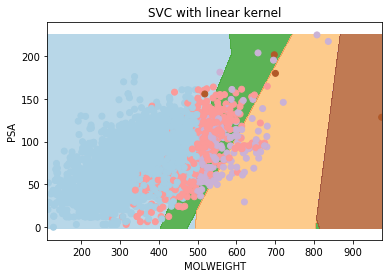

In [70]:
import matplotlib.pyplot as plt
plt.subplot(1, 1, 1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_logD['MOLWEIGHT'], X_logD['PSA'], c=y_logD['NUM_RO5_VIOLATIONS'], cmap=plt.cm.Paired)
plt.xlabel('MOLWEIGHT')
plt.ylabel('PSA')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

This model can be used to select and classify the compounds.
From the plot above we can see four major separations, these will help in the selection of the compounds, choosing the points that are far from the hyperplane. 